<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/trash1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
print([train_target[i] for i in range(10)])

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


In [18]:
!pip install -q -U google-generativeai

import google.generativeai as genai
from google.colab import userdata

# 코랩에 저장된 API 키를 불러옵니다.
API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=API_KEY)

# 사용할 모델 설정
model = genai.GenerativeModel('gemini-pro')


In [19]:
from google.colab import drive
import os
import glob
from PIL import Image
import numpy as np

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 데이터셋 경로 지정
dataset_base_path = '/content/drive/MyDrive/my_dataset'

# 이미지 파일 경로와 라벨 목록을 담을 리스트
train_images = []
train_labels = []
test_images = []
test_labels = []

# 각 클래스 폴더의 이름을 라벨로 사용
class_names = sorted(os.listdir(os.path.join(dataset_base_path, 'train')))
class_to_idx = {name: i for i, name in enumerate(class_names)}
print(f"클래스 매핑: {class_to_idx}")

# train 데이터 불러오기
for class_name in class_names:
    class_path = os.path.join(dataset_base_path, 'train', class_name)
    for img_path in glob.glob(os.path.join(class_path, '*.jpg')):
        img = Image.open(img_path).convert('RGB') # 이미지 로드 및 RGB 변환
        img = img.resize((28, 28)) # 원하는 크기로 리사이즈
        train_images.append(np.array(img))
        train_labels.append(class_to_idx[class_name])

# test 데이터 불러오기 (위와 동일한 과정)
for class_name in class_names:
    class_path = os.path.join(dataset_base_path, 'test', class_name)
    for img_path in glob.glob(os.path.join(class_path, '*.jpg')):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((28, 28))
        test_images.append(np.array(img))
        test_labels.append(class_to_idx[class_name])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
클래스 매핑: {'class_0': 0, 'class_1': 1, 'class_2': 2, 'class_3': 3, 'class_4': 4}


In [20]:
# 리스트를 NumPy 배열로 변환
train_input = np.array(train_images)
train_target = np.array(train_labels).astype(int)
test_input = np.array(test_images)
test_target = np.array(test_labels).astype(int)

# 픽셀 값 정규화 (0-255 -> 0.0-1.0)
train_input = train_input / 255.0
test_input = test_input / 255.0

# 데이터 형태 확인
print(f"훈련 이미지 형태: {train_input.shape}")
print(f"훈련 라벨 형태: {train_target.shape}")
print(f"테스트 이미지 형태: {test_input.shape}")
print(f"테스트 라벨 형태: {test_target.shape}")

# 최종적으로 아래와 같은 형식으로 데이터를 묶습니다.
(train_input, train_target), (test_input, test_target) = (train_input, train_target), (test_input, test_target)

# 이제 keras 모델에 이 데이터를 바로 사용할 수 있습니다.
# model.fit(train_input, train_target, ...)

훈련 이미지 형태: (1332, 28, 28, 3)
훈련 라벨 형태: (1332,)
테스트 이미지 형태: (0,)
테스트 라벨 형태: (0,)


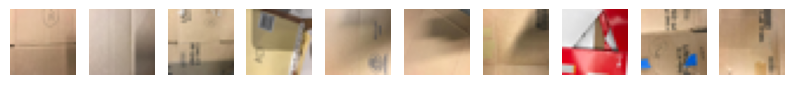

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [22]:
print([train_target[i] for i in range(10)])

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
